# Case 1. Coronary Heart Disease
Name: Dmytro Izotov<br>
Last edited: 3.02.2019<br>
Cognitive Systems for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

## 1. Objectives

With the use of provided [DATA](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/) from UCI archives, create and train a dense neural network to predict to classify the presense of heart disease.  

## 2. Required libraries

In [186]:
# Import libraries
%pylab inline
import time
import warnings
import pandas as pd

from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

from keras.utils import to_categorical
from keras import models, layers
from keras.callbacks import TensorBoard

Populating the interactive namespace from numpy and matplotlib


C:\Users\Dizotoff\Anaconda3\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sum', 'shuffle', 'median', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 3. Data description and preprocessing

###### First, lets try to improve perfomance with the additional data using all provided datasets. 

In [187]:
url1 = r'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
df1 = pd.read_csv(url1, sep = ',', header = None, index_col = None,na_values = '?')

url2 = r'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
df2 = pd.read_csv(url2, sep = ',', header = None, index_col = None,na_values = '?')

url3 = r'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'
df3 = pd.read_csv(url3, sep = ',', header = None, index_col = None,na_values = '?')

url = r'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, sep = ',', header = None, index_col = None,na_values = '?')

#Adding them together + columns names
dataframe = pd.concat([df, df1, df2, df3], ignore_index=True)
name_list = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg',
             'thalac','exang','oldpeak','slope','ca','thal','num']

dataframe.columns = name_list
df.columns = name_list

#Not ideal dataset concated from 4 different ones
dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


###### Lets compare described information of both ideal and concated datasets.Columns "ca" and "thal" have a serious lack of data in the new dataset, we need to do something with it. After I tried to fill missing data with columnwise median values, it cause a huge difference in mean value of column "ca" in comparison to first ideal dataframe, every other columns were fine. 

In [188]:
#Ideal dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


###### I decided to take a mean from the first ideal df and use it in the new concated dataframe, so we could create more data

In [189]:
median = df["ca"].mean()
dataframe["ca"] = dataframe["ca"].fillna(median)


###### Going throught the mins and maxs helped to find another two problems: min value of cholesterol in concated table is 0 which is not possible and min value of oldpeak is -2.6. Need to fix that. Seems like some columns of chol table have values of 0 (around 175 cells), lets substitute them with means of with average value of the column exluding 0 values. Also, there are only few of negative ones in oldpeak column, which is definitely an additional noise, so lets just convert all them to zero


In [190]:
counter=0
sum=0

#counting amount of chol cells which are 0
for c in dataframe["chol"]:
    if (c==0):
        counter=counter+1
        
#Summing all the data  
for b in dataframe["chol"]:
    sum=sum+b
    
#Calculating new average of column exluding cells with 0 value
new_mean = sum/(len(dataframe["chol"])-counter)

#Rewrite
dataframe.loc[dataframe.chol == 0,'chol'] = new_mean

#Every value of oldpeak that less than 0 converts into 0
dataframe.loc[dataframe.oldpeak < 0,'oldpeak'] = 0

In [191]:
# Fill missing data with columnwise median values
dataframe = dataframe.fillna(dataframe.median())

# Shuffling the data
dataframe = shuffle(dataframe)
dataframe.tail()

# Select the data (input) columns
data_list = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg',
             'thalac','exang','oldpeak','slope','ca','thal']
data = dataframe[data_list]

# Normalization
data_min = data.min()
data_max = data.max()
data_norm = (data - data_min)/(data_max - data_min)

dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,131.995652,245.222826,0.150000,0.603261,137.692391,0.366304,0.867065,1.847826,0.673629,5.569565,0.995652
std,9.424685,0.408148,0.930969,18.451300,51.785328,0.357266,0.805443,25.145235,0.482056,1.037004,0.516007,0.541671,1.393888,1.142693
min,28.000000,0.000000,1.000000,0.000000,85.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,217.750000,0.000000,0.000000,120.000000,0.000000,0.000000,2.000000,0.672241,6.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,239.500000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.672241,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,0.672241,6.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


###### Here we could compare new dataframe to the very fisrt "perfect" set of data, looks fine. I got 3 times more data. Not sure if that was a right idea from the beginning, but lets see 

In [192]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


###### Initially, histogram of labels showed us that values of severity of disease had been spreaded very unequally around between 1,2,3,4. So I decided to convert all labels to 1s (sick) and 0s (healthy)

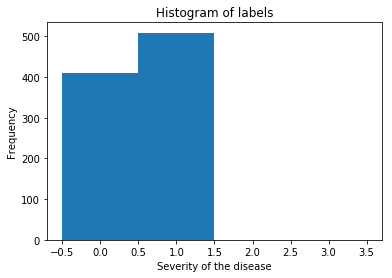

Shape of data and one-hot-labels: (920, 13) (920, 2)


In [193]:
# Select labels 
labels = dataframe['num']
labels = 1.0*(labels > 0.0) 
# Plot the histogram of the labels (severity of the disease)
plt.hist(labels, bins = [-0.5, 0.5, 1.5, 2.5, 3.5])
plt.xlabel('Severity of the disease')
plt.ylabel('Frequency')
plt.title('Histogram of labels')
show()

# Code labels to categorical output
one_hot_labels = to_categorical(labels)
one_hot_labels[:2]

# Check the shapes of the normalized data and categorical output
print('Shape of data and one-hot-labels:', data_norm.shape, one_hot_labels.shape)

# Split the data and labels into training and validation sets
train_data = data_norm[:640]
val_data = data_norm[640:]

train_labels = one_hot_labels[:640]
val_labels = one_hot_labels[640:]

## 4. Modeling and compilation




###### Binary problem - sigmoid activation at output layer. Other layers - Relu (not expensive like sigmoid or TanH, learns faster, avoids the vanishing gradient problem). There is no practical reason to use more than one hidden layer in our problem.  There were some overfitting, so I used dropout function to avoit that.  Training/validation 66/33 roughly, adam seemed to performed better than others optimizers.

In [194]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(9, activation='relu', input_shape=(13,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

# Compile the model
model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 9)                 126       
_________________________________________________________________
dropout_18 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 20        
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


## 5. Training and Validation

###### Amount of epochs and value batch_size were picked experimentally. 

In [195]:
# Fit the model with the data and keep record on elapsed time
t_start = time.time()
history = model.fit(train_data, train_labels, 
                    epochs = 150, 
                    batch_size = 10, 
                    verbose = 0,
                    validation_data = (val_data, val_labels))
t_end = time.time()
print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))


Elapsed time: 17.92 seconds


## 6. Evaluation

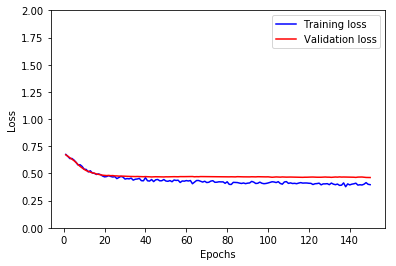

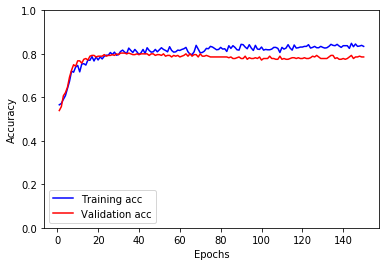

Simple guess accuracy: 0.4467
Confusion matrix:
[[411   0]
 [509   0]]


In [196]:
# Get the training data
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

# Visualize the training process: loss function
plt.figure()
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend()
plt.show()

# Visualize the accuracy
plt.figure()
plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

# Print total accuracy and confusion matrix
val_predicts = model.predict(data_norm)
y_pred = argmax(val_predicts, axis = 1)

# Best guess = Guess that all are normal
simple_guess = zeros(len(y_pred))
cm0 = confusion_matrix(labels, simple_guess)
#Transpose the matrix if you want real values be in x-axis
#cm0 = np.transpose(cm0)
true0 = np.trace(cm0)
N = len(labels)
acc0 = true0/N
print('Simple guess accuracy: {:.4f}'.format(acc0))
print('Confusion matrix:')
print(cm0)




## 7. Results and Discussion

In [197]:
# Our model results
print(' ')
cm1 = confusion_matrix(labels, y_pred)
#cm1 = transpose(cm1)
true1 = np.trace(cm1)
N = len(labels)
acc1 = true1/N
print('Total accuracy: {:.4f}'.format(acc1))
print('Confusion matrix:')
print(cm1)

 
Total accuracy: 0.8261
Confusion matrix:
[[321  90]
 [ 70 439]]


In [198]:
# Calculate precision, recall, fscore and support
# Suppress warnings as the f-score is zero
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    p, r, f, s = precision_recall_fscore_support(labels, y_pred)


# Print precision, recall, fscore and support  
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print('Support:\n', s)
print('Precision:', p)
print('Recall:   ', r)
print('F-score:  ', f)

Support:
 [411 509]
Precision: [ 0.821  0.830]
Recall:    [ 0.781  0.862]
F-score:   [ 0.800  0.846]


###### Total accuracy value doesn't represent the real accuracy of the model, because data were picked from one dataset and tested with regular testing method. Most likely, there were no obvious reason to feed all data to the model, I could use only one from cleveland. 
